In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import pylab as py
from plotly.subplots import make_subplots
from sklearn import preprocessing
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import shap

import pandas as pd
df = pd.read_csv('C:\\Users\\SUSNATA BISWAS\\OneDrive\\Desktop\\UAV.csv')

C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,uvindex,severerisk,conditions,icon,stations,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,"Birmingham, England, United Kingdom",6/1/2022,8.5,8,6.7,88.53,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",69.0,0.281703,22.382043,2.566546,24.11447322
1,"Birmingham, England, United Kingdom",6/1/2022,6.8,6.8,6.3,96.41,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",340.0,-0.900007,28.187742,10.483025,22.11221897
2,"Birmingham, England, United Kingdom",6/1/2022,6.2,6.2,5.8,97.67,0,0,NaN,0,...,0,10,Clear,clear-night,"03529099999,03414099999,EGBB,03535099999,03534...",266.0,-0.688493,29.375444,1.553021,24.97105023
3,"Birmingham, England, United Kingdom",6/1/2022,5.5,4.6,5.3,98.46,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",18.0,0.635886,23.710883,13.169636,26.51038418
4,"Birmingham, England, United Kingdom",6/1/2022,6,6,5.8,98.6,0,0,NaN,0,...,0,10,Overcast,cloudy,"03529099999,03414099999,EGBB,03535099999,03534...",35.0,0.526626,20.025423,14.554085,21.45772112
5,"Birmingham, England, United Kingdom",6/1/2022,7.1,7.1,7,98.95,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",358.0,-0.908703,26.219584,11.742752,19.3975562
6,"Birmingham, England, United Kingdom",6/1/2022,8.4,7.3,8.2,98.81,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",224.0,-0.661019,20.292279,12.470840,12.9191122
7,"Birmingham, England, United Kingdom",6/1/2022,9.4,8.9,8.8,96.14,0.02,100,rain,0,...,1,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",111.0,0.317224,23.896022,14.545962,23.90359735
8,"Birmingham, England, United Kingdom",6/1/2022,10.9,10.9,9,88.14,0.02,100,rain,0,...,2,10,"Rain, Partially cloudy",rain,"03529099999,EGBB,03647099999,03535099999,03534...",279.0,0.454431,20.007064,2.977960,25.38914851
9,"Birmingham, England, United Kingdom",6/1/2022,11,11,8.8,86.8,0.02,100,rain,0,...,2,10,"Rain, Overcast",rain,"03529099999,03414099999,EGBB,03647099999,03535...",360.0,0.346707,26.105161,5.923844,29.61544896


In [3]:
df.shape

(601, 29)

In [4]:
df.dtypes

name                 object
datetime             object
temp                 object
feelslike            object
dew                  object
humidity             object
precip               object
precipprob           object
preciptype           object
snow                 object
snowdepth            object
windgust             object
windspeed            object
winddir              object
sealevelpressure     object
cloudcover           object
visibility           object
solarradiation       object
solarenergy          object
uvindex              object
severerisk           object
conditions           object
icon                 object
stations             object
Gap angle           float64
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed      object
dtype: object

In [5]:
df.isnull().sum()

name                  0
datetime              0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
preciptype          448
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy         134
uvindex               0
severerisk            0
conditions            0
icon                  0
stations            364
Gap angle             1
cos(gap angle)        1
UAV Speed             0
UAV Payload           0
Final UAV Speed       0
dtype: int64

In [6]:
df = df.drop(['name','datetime','stations','preciptype','precipprob','solarenergy'] , axis = 1)
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [7]:
df = df.dropna()
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [8]:
df['temp'] = pd.to_numeric(df['temp'])
df['dew'] = pd.to_numeric(df['dew'])
df['humidity'] = pd.to_numeric(df['humidity'])
df['precip'] = pd.to_numeric(df['precip'])
df['windspeed'] = pd.to_numeric(df['windspeed'])
df['snowdepth'] = pd.to_numeric(df['snowdepth'])
df['sealevelpressure'] = pd.to_numeric(df['sealevelpressure'])
df['solarradiation'] = pd.to_numeric(df['solarradiation'])
df['uvindex'] = pd.to_numeric(df['uvindex'])
df['visibility'] = pd.to_numeric(df['visibility'])
df['cloudcover'] = pd.to_numeric(df['cloudcover'])
df['windgust'] = pd.to_numeric(df['windgust'])
df['Final UAV Speed'] = pd.to_numeric(df['Final UAV Speed'])
df['snow'] = pd.to_numeric(df['snow'])
df['winddir'] = pd.to_numeric(df['winddir'])
df['severerisk'] = pd.to_numeric(df['severerisk'])

In [9]:
df.dtypes

temp                float64
feelslike            object
dew                 float64
humidity            float64
precip              float64
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
uvindex               int64
severerisk            int64
conditions           object
icon                 object
Gap angle           float64
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed     float64
dtype: object

In [10]:
df1 = df.drop(['snow','snowdepth','Gap angle','feelslike'], axis = 1)
df1

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,icon,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,270.0,1014.4,28.1,19.7,0.0,0,10,Partially cloudy,partly-cloudy-night,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,286.0,1015.0,20.5,16.6,0.0,0,10,Partially cloudy,partly-cloudy-night,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,195.0,1015.1,4.4,12.1,0.0,0,10,Clear,clear-night,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,192.0,1015.0,28.7,10.1,0.0,0,10,Partially cloudy,partly-cloudy-night,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,174.0,1014.4,92.3,13.1,0.0,0,10,Overcast,cloudy,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,206.9,1001.0,99.7,10.0,370.0,4,10,Overcast,cloudy,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,205.9,1001.3,73.1,14.7,272.3,3,10,Partially cloudy,partly-cloudy-day,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,204.9,1001.7,46.6,19.4,174.7,2,10,Partially cloudy,partly-cloudy-day,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,203.9,1002.0,20.0,24.1,77.0,0,10,Clear,clear-night,-0.710821,27.896114,9.099070,10.335083


In [11]:
df1.describe()

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,14.123667,9.645500,76.706483,0.105617,28.907500,14.353667,194.331500,1012.882333,66.509500,18.594167,212.190500,2.058333,9.988333,-0.005588,25.052038,7.857236,23.633804
std,3.615655,2.409001,17.167332,0.523356,13.098442,6.067516,77.760222,6.996211,32.847319,6.241355,249.865478,2.554566,0.285774,0.700560,2.921348,4.333054,16.959344
min,4.200000,4.100000,38.610000,0.000000,0.700000,0.100000,1.000000,999.000000,0.000000,2.600000,0.000000,0.000000,3.000000,-0.999991,20.007064,0.000658,-13.239399
25%,11.100000,8.075000,63.465000,0.000000,18.975000,9.550000,163.425000,1005.000000,41.650000,13.500000,5.000000,0.000000,10.000000,-0.685232,22.381371,4.115684,10.010298
50%,14.000000,9.500000,78.655000,0.000000,31.000000,14.900000,212.100000,1014.900000,76.200000,21.400000,103.650000,1.000000,10.000000,0.032132,25.060941,8.049659,23.752505
75%,16.800000,11.000000,92.245000,0.000000,38.500000,18.725000,239.000000,1018.475000,97.950000,24.100000,360.250000,4.000000,10.000000,0.679040,27.698550,11.724594,37.309571
max,25.500000,16.600000,99.940000,7.180000,58.700000,29.500000,360.000000,1023.100000,100.000000,24.100000,997.000000,10.000000,10.000000,1.000000,29.970661,14.999302,67.028284


<AxesSubplot:xlabel='temp', ylabel='Final UAV Speed'>

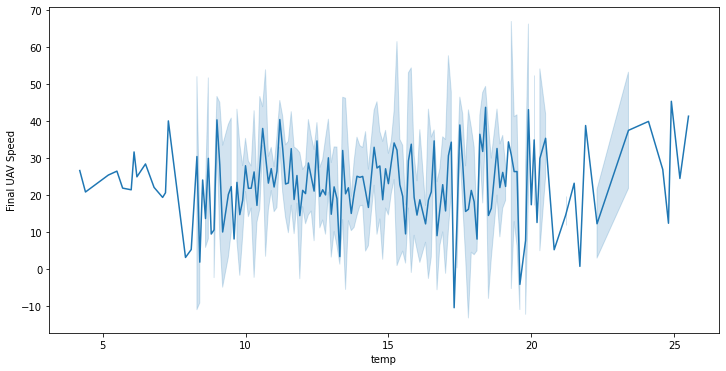

In [12]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "temp", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='dew', ylabel='Final UAV Speed'>

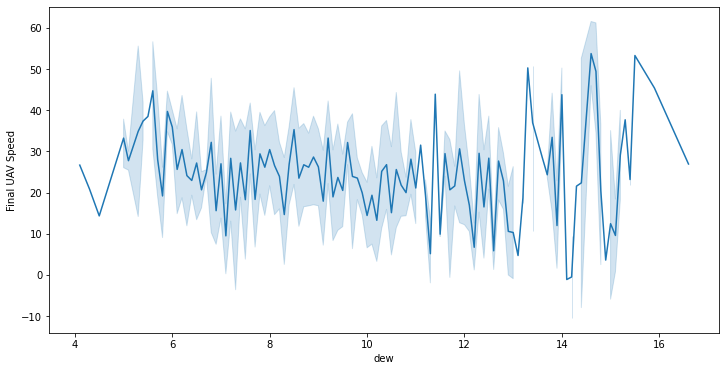

In [13]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "dew", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='humidity', ylabel='Final UAV Speed'>

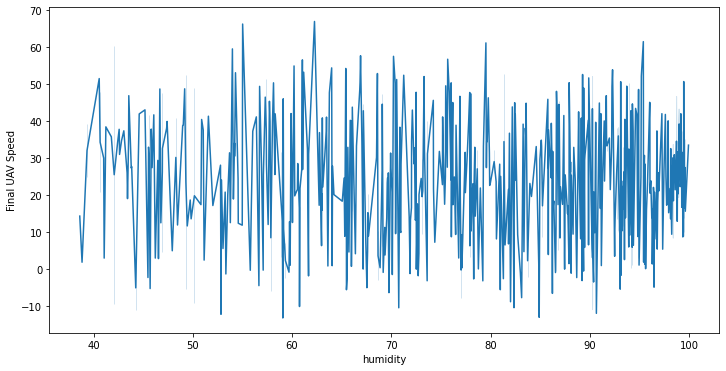

In [14]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "humidity", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='precip', ylabel='Final UAV Speed'>

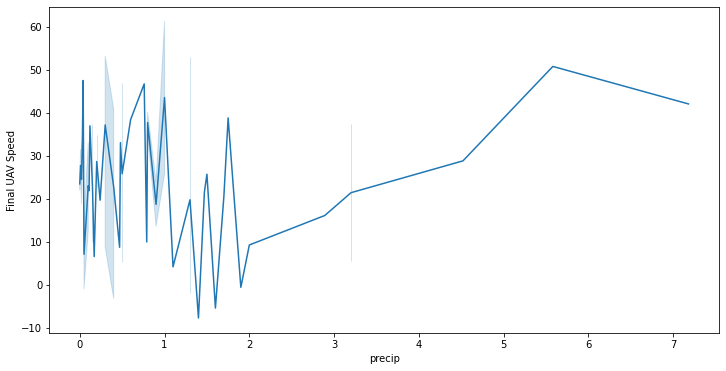

In [15]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "precip", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='windgust', ylabel='Final UAV Speed'>

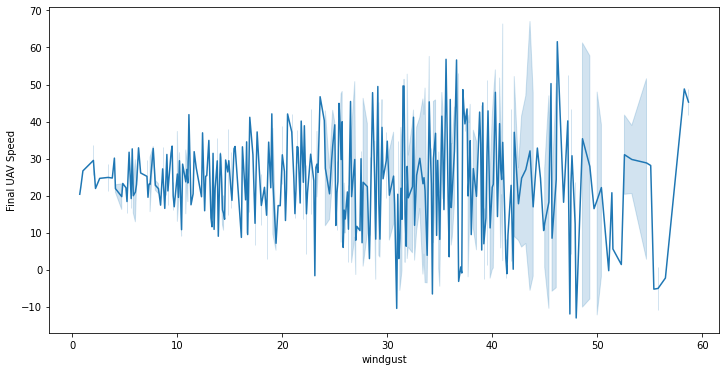

In [16]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "windgust", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='windspeed', ylabel='Final UAV Speed'>

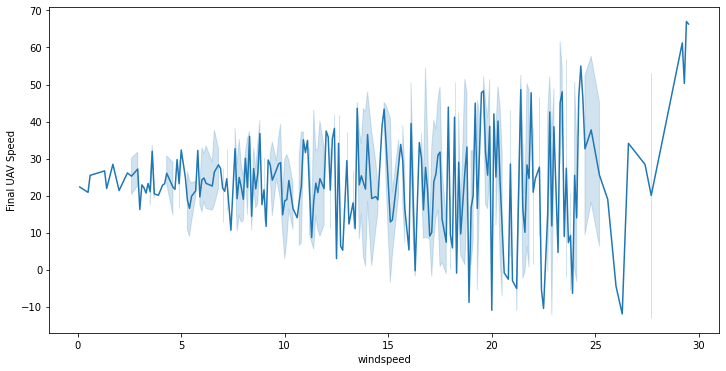

In [17]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "windspeed", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='winddir', ylabel='Final UAV Speed'>

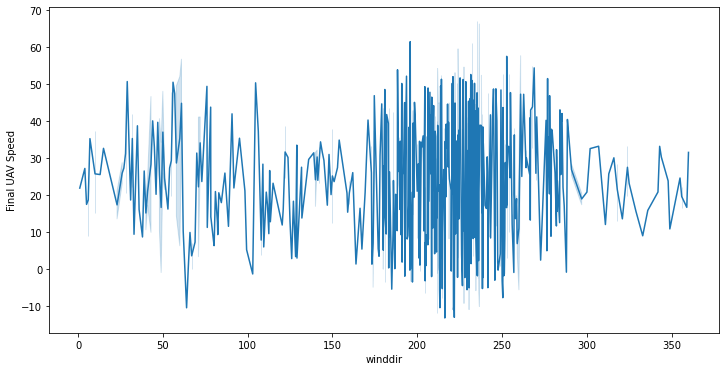

In [18]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "winddir", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='sealevelpressure', ylabel='Final UAV Speed'>

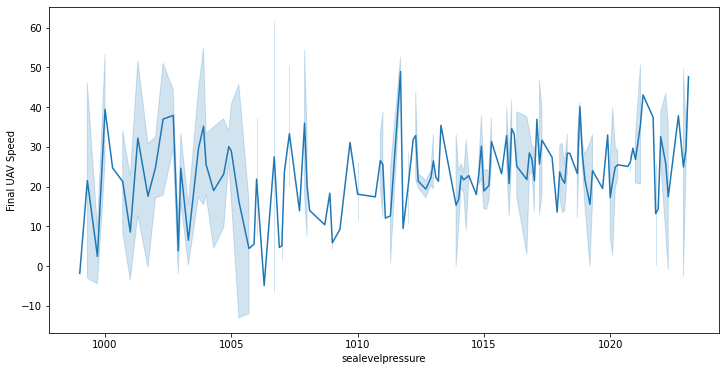

In [19]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "sealevelpressure", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='cloudcover', ylabel='Final UAV Speed'>

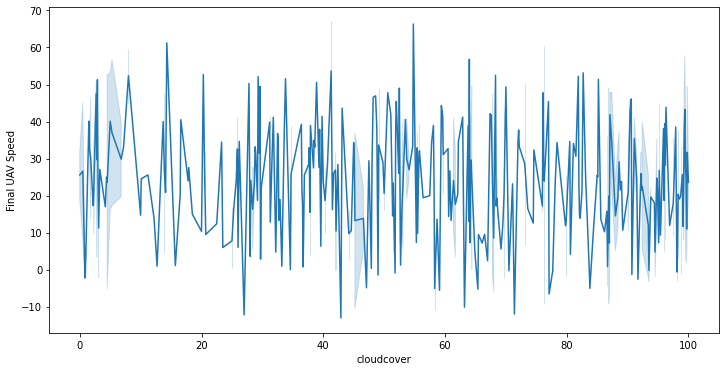

In [20]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "cloudcover", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='visibility', ylabel='Final UAV Speed'>

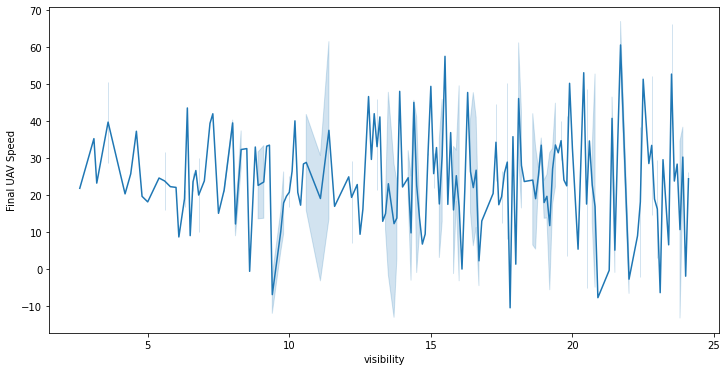

In [21]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "visibility", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='solarradiation', ylabel='Final UAV Speed'>

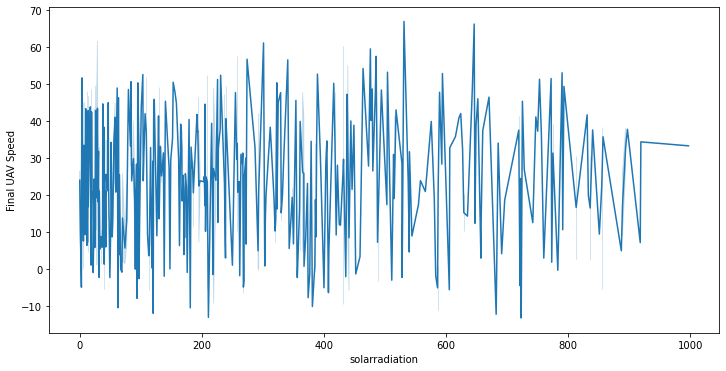

In [22]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "solarradiation", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='uvindex', ylabel='Final UAV Speed'>

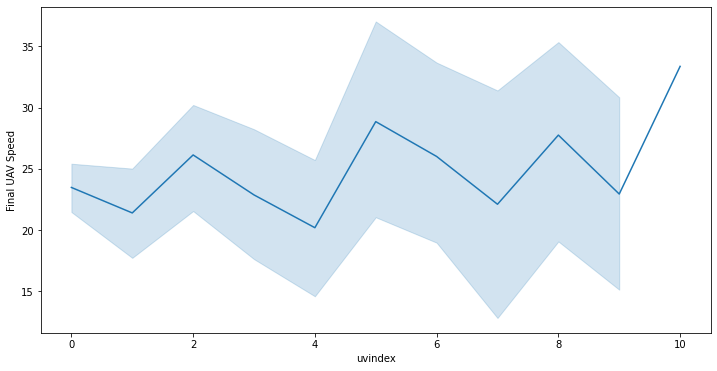

In [23]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "uvindex", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='severerisk', ylabel='Final UAV Speed'>

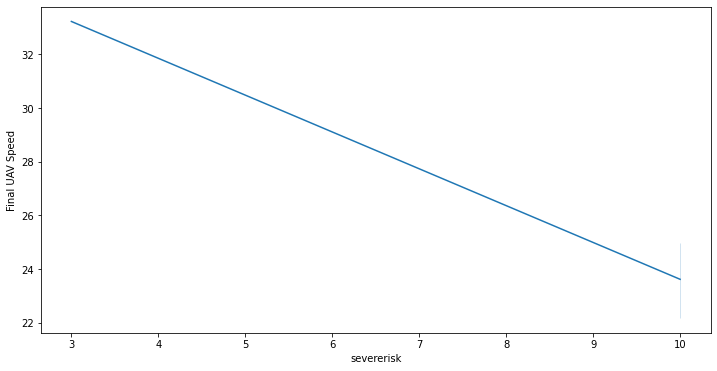

In [24]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "severerisk", y = "Final UAV Speed", data = df1)

8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


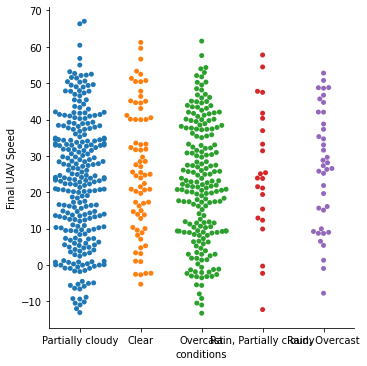

In [25]:
matplotlib.rcParams['figure.figsize'] = (100,50)
sns.catplot(x = "conditions", y = "Final UAV Speed", kind="swarm", data=df1)

5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


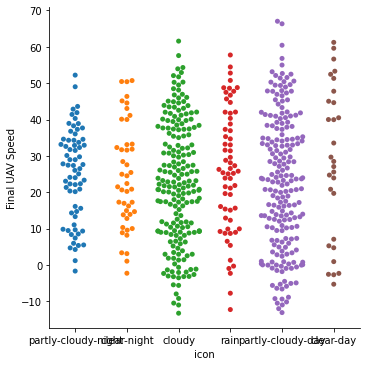

In [26]:
matplotlib.rcParams['figure.figsize'] = (35,25)
sns.catplot(x = "icon", y = "Final UAV Speed", kind="swarm", data=df1)

<AxesSubplot:xlabel='icon', ylabel='Final UAV Speed'>

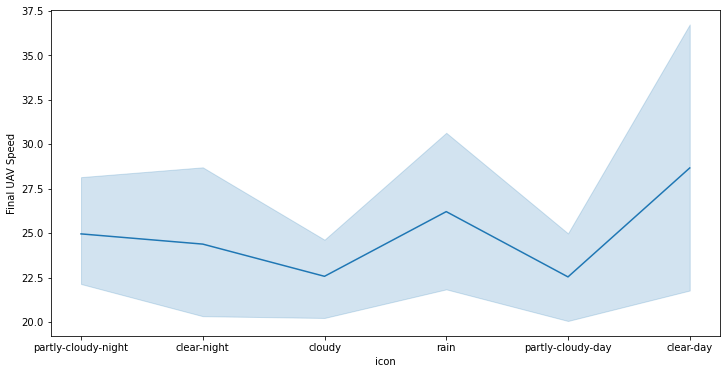

In [27]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "icon", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='cos(gap angle)', ylabel='Final UAV Speed'>

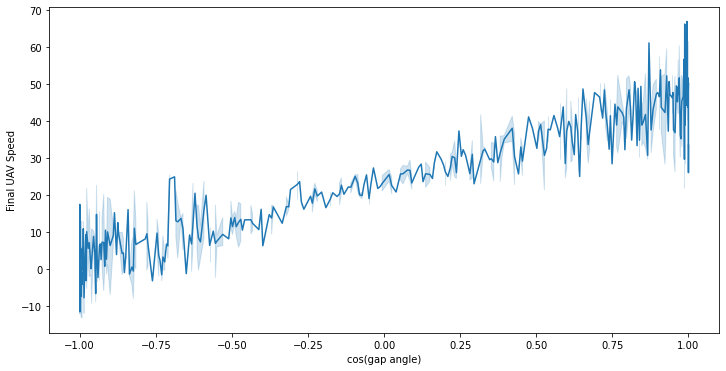

In [28]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "cos(gap angle)", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='UAV Speed', ylabel='Final UAV Speed'>

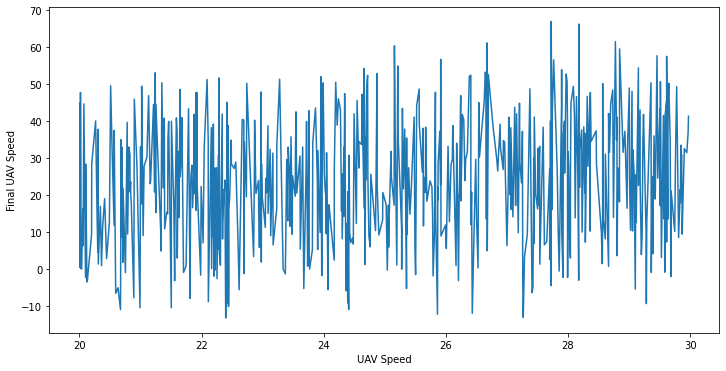

In [29]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "UAV Speed", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='UAV Payload', ylabel='Final UAV Speed'>

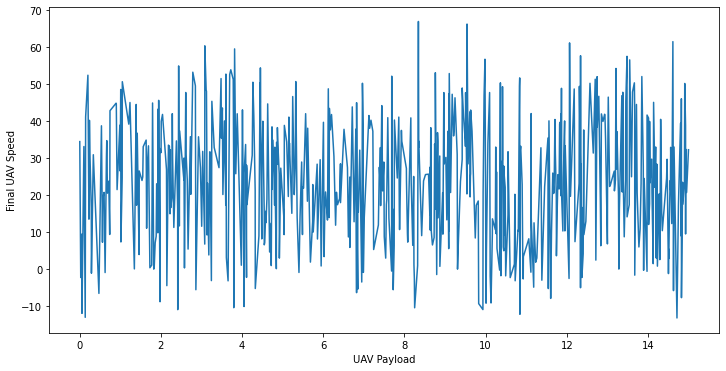

In [30]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "UAV Payload", y = "Final UAV Speed", data = df1)

In [31]:
df1.corr()

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
temp,1.000000,0.261018,-0.785527,-0.110631,0.300637,0.331592,0.094203,0.088574,0.046464,0.248875,0.653574,0.652344,0.018364,-0.028072,0.001794,0.099909,-0.006683
dew,0.261018,1.000000,0.380681,0.051072,0.075662,0.155586,-0.129863,-0.246358,0.231069,-0.232616,-0.182346,-0.200040,0.010957,-0.081854,0.083590,0.007767,-0.063390
humidity,-0.785527,0.380681,1.000000,0.149401,-0.231986,-0.230858,-0.167876,-0.232820,0.121175,-0.401711,-0.731311,-0.743307,-0.006130,-0.018234,0.044528,-0.093904,-0.029181
precip,-0.110631,0.051072,0.149401,1.000000,0.014675,0.109004,-0.161061,-0.073379,0.158921,-0.210414,-0.042638,-0.040991,0.005908,0.024418,0.035949,-0.048133,0.033613
windgust,0.300637,0.075662,-0.231986,0.014675,1.000000,0.796842,0.203178,-0.318515,0.019662,0.339534,0.192161,0.201843,0.063399,-0.016664,0.033437,0.042833,-0.011551
windspeed,0.331592,0.155586,-0.230858,0.109004,0.796842,1.000000,-0.010258,-0.441796,0.104742,0.230432,0.296528,0.307474,0.037430,0.012405,0.026913,0.042183,0.028862
winddir,0.094203,-0.129863,-0.167876,-0.161061,0.203178,-0.010258,1.000000,-0.193482,-0.081445,0.193716,0.207987,0.196125,-0.078183,0.012623,0.053694,0.044946,0.007377
sealevelpressure,0.088574,-0.246358,-0.232820,-0.073379,-0.318515,-0.441796,-0.193482,1.000000,-0.170293,-0.009874,0.021055,0.025820,-0.019392,0.107674,-0.034928,-0.047790,0.084504
cloudcover,0.046464,0.231069,0.121175,0.158921,0.019662,0.104742,-0.081445,-0.170293,1.000000,-0.077544,0.075151,0.074160,-0.007084,-0.048238,-0.049512,0.049678,-0.061139
visibility,0.248875,-0.232616,-0.401711,-0.210414,0.339534,0.230432,0.193716,-0.009874,-0.077544,1.000000,0.185789,0.195437,0.018307,0.021539,0.038812,0.039751,0.036174


In [32]:
df2 = df1.drop(['icon','severerisk','winddir','cloudcover'], axis = 1)
df2

,temp,dew,humidity,precip,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,1014.4,19.7,0.0,0,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,1015.0,16.6,0.0,0,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,1015.1,12.1,0.0,0,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,1015.0,10.1,0.0,0,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,1014.4,13.1,0.0,0,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,1001.0,10.0,370.0,4,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,1001.3,14.7,272.3,3,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,1001.7,19.4,174.7,2,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,1002.0,24.1,77.0,0,Clear,-0.710821,27.896114,9.099070,10.335083


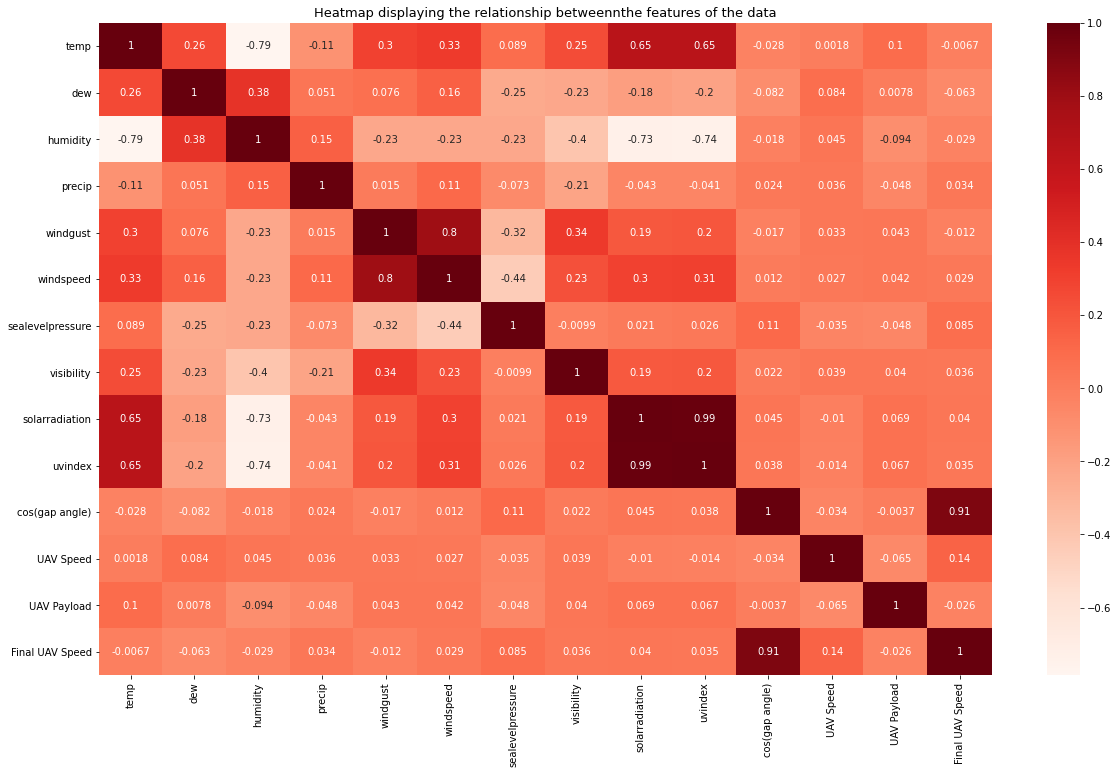

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

In [34]:
df3 = df2.drop(['humidity','uvindex','sealevelpressure','solarradiation'], axis = 1)
df3

,temp,dew,precip,windgust,windspeed,visibility,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,0.0,7.9,5.4,19.7,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,0.0,5.1,3.2,16.6,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,0.0,6.2,4.3,12.1,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,0.0,8.9,5.3,10.1,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,0.0,7.9,4.3,13.1,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,0.0,31.4,15.7,14.7,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,0.0,32.6,14.5,19.4,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,0.1,33.8,13.3,24.1,Clear,-0.710821,27.896114,9.099070,10.335083


In [35]:
df3['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Partially cloudy',
       'Rain, Overcast'], dtype=object)

In [36]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ['conditions'])

In [37]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [38]:
x1 =one_hot_encoded_data[['temp']].to_numpy()
x2 = one_hot_encoded_data[['dew']].to_numpy()
x3 = one_hot_encoded_data[['precip']].to_numpy()
x4= one_hot_encoded_data[['windgust']].to_numpy()
x5 = one_hot_encoded_data[['visibility']].to_numpy()
x6 = one_hot_encoded_data[['windspeed']].to_numpy()
x7 =one_hot_encoded_data[['cos(gap angle)']].to_numpy()
x8 = one_hot_encoded_data[['UAV Speed']].to_numpy()
x9 = one_hot_encoded_data[['UAV Payload']].to_numpy()

In [39]:
grubbs_test(x1)
grubbs_test(x2)
grubbs_test(x3)
grubbs_test(x4)
grubbs_test(x5)
grubbs_test(x6)
grubbs_test(x7)
grubbs_test(x8)
grubbs_test(x9)

Grubbs Calculated Value: [3.14903532]
Grubbs Critical Value: 3.9108932748778575
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: [2.88929022]
Grubbs Critical Value: 3.9108932748778575
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: [13.52861595]
Grubbs Critical Value: 3.9108932748778575
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers

Grubbs Calculated Value: [2.27640499]
Grubbs Critical Value: 3.9108932748778575
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: [2.56474963]
Grubbs Critical Value: 3.9108932748778575
From grubbs_test we ob

In [40]:
out = []
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(one_hot_encoded_data['temp'])

Outliers: [25.2, 25.5]


In [41]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['temp'])

Outliers: [25.5]


In [42]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(one_hot_encoded_data['temp'])

Outliers: [5.5, 6.0, 5.2, 4.4, 4.2, 5.7, 24.6, 24.9, 25.2, 25.5, 24.8, 24.1]


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


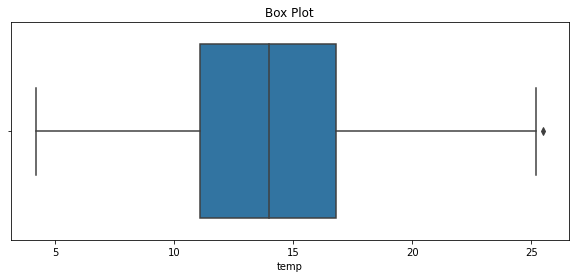

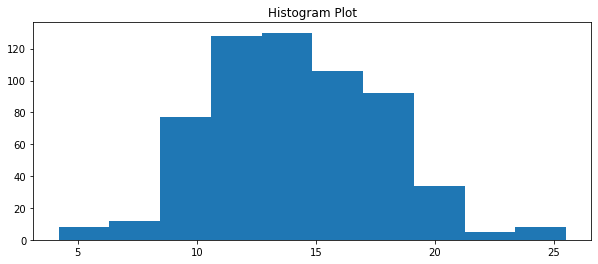

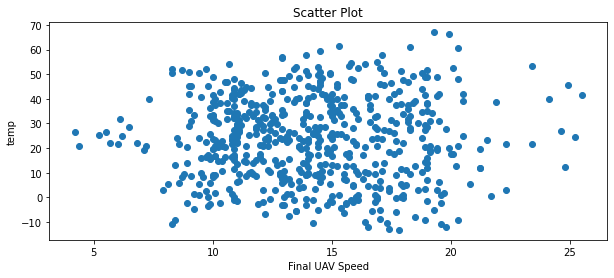

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


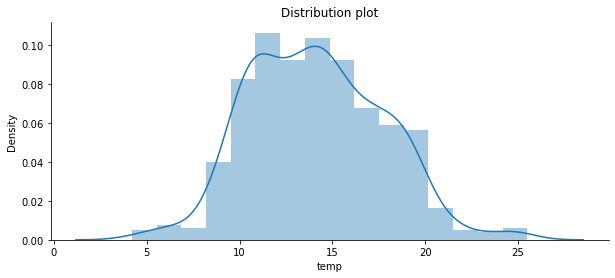

<Figure size 720x288 with 0 Axes>

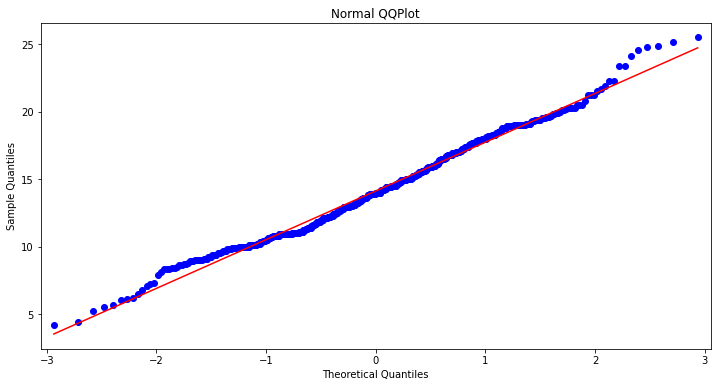

In [43]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['temp'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['temp'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('temp')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['temp'],one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['temp'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['temp'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


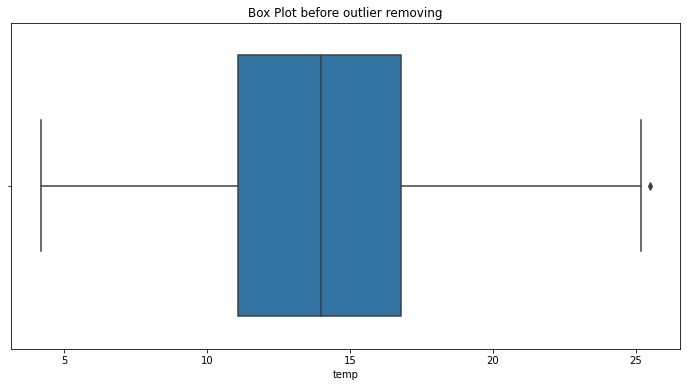

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


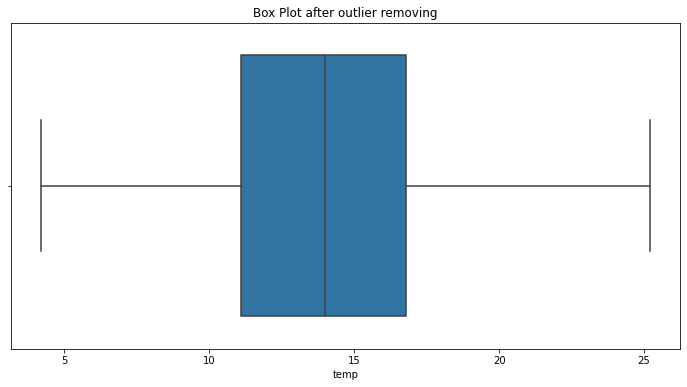

In [44]:
from matplotlib import pyplot as plt
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(one_hot_encoded_data, 'temp')
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot after outlier removing")
plt.show()

In [45]:
out = []
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(one_hot_encoded_data['dew'])

Outliers: []


In [46]:
out = []
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(one_hot_encoded_data['precip'])

Outliers: [2.89, 4.52, 5.58, 7.18, 1.75, 2.0, 1.7, 3.2, 3.2, 1.9]


In [47]:
med = np.median(one_hot_encoded_data['precip'])

for i in one_hot_encoded_data['precip']:
    if i >= 1.9 and i <= 7.18:
            one_hot_encoded_data['precip'] = one_hot_encoded_data['precip'].replace(i, med)

In [48]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['precip'])

Outliers: [0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.12, 0.01, 1.47, 0.15, 0.05, 0.04, 0.24, 0.48, 0.8, 0.47, 0.79, 1.75, 0.76, 0.02, 0.01, 0.02, 0.05, 0.11, 0.15, 0.03, 0.02, 0.01, 0.15, 0.17, 0.1, 0.1, 0.9, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 0.5, 0.5, 0.2, 1.0, 0.5, 0.2, 0.3, 1.3, 1.5, 0.1, 0.4, 0.4, 1.3, 0.8, 0.6, 0.2, 0.1, 0.2, 0.5, 0.9, 1.4, 0.1, 1.7, 1.6, 1.0, 0.2, 0.5, 1.1, 0.3, 0.1, 0.4, 0.5, 1.3, 0.1]


In [49]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(one_hot_encoded_data['precip'])

Outliers: [1.47, 1.75, 1.5, 1.4, 1.7, 1.6]


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


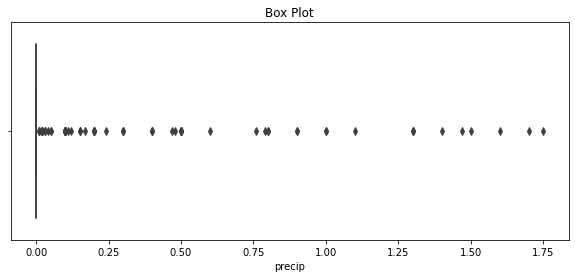

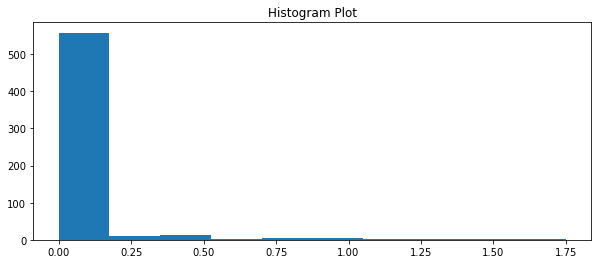

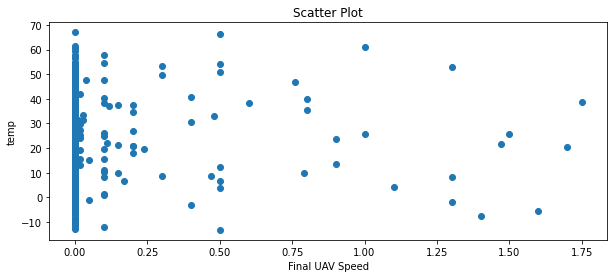

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


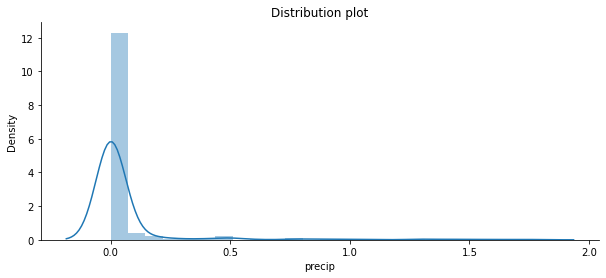

<Figure size 720x288 with 0 Axes>

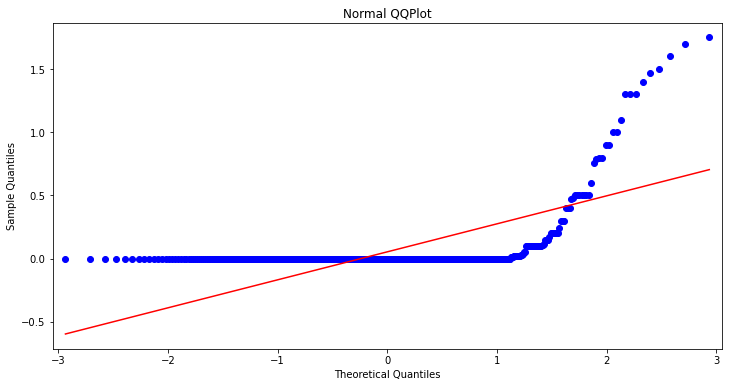

In [50]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['precip'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['precip'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('temp')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['precip'],one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['precip'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['precip'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


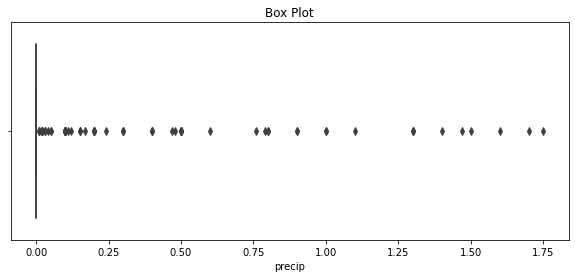

In [51]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['precip'])

In [52]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(one_hot_encoded_data['windspeed'])

Outliers: []


In [53]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['windspeed'])

Outliers: []


In [54]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windspeed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windspeed'] = one_hot_encoded_data['windspeed'].replace(i, med)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


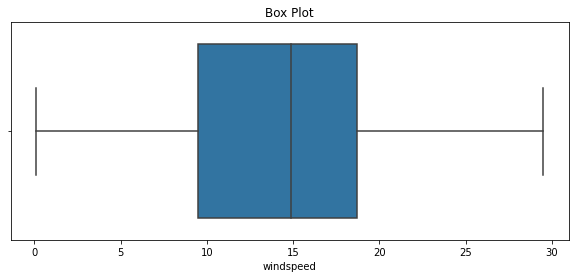

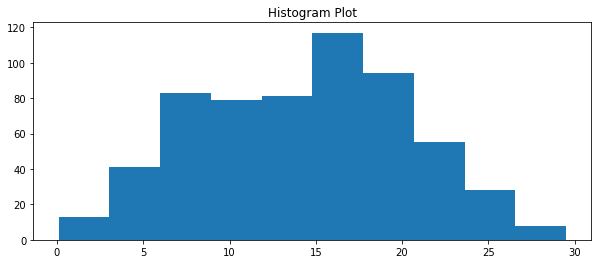

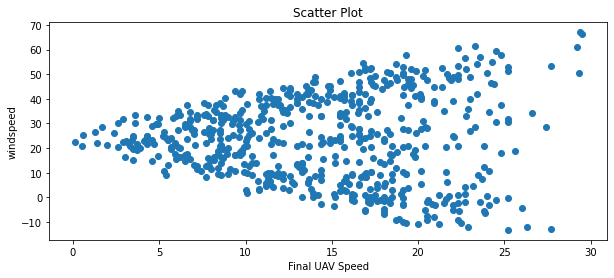

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


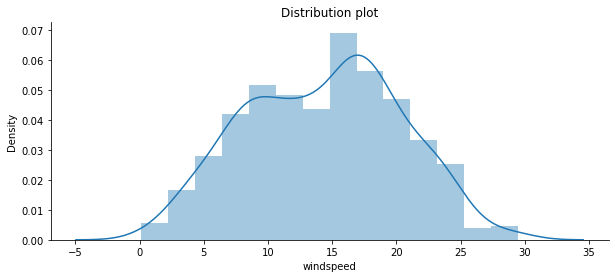

<Figure size 720x288 with 0 Axes>

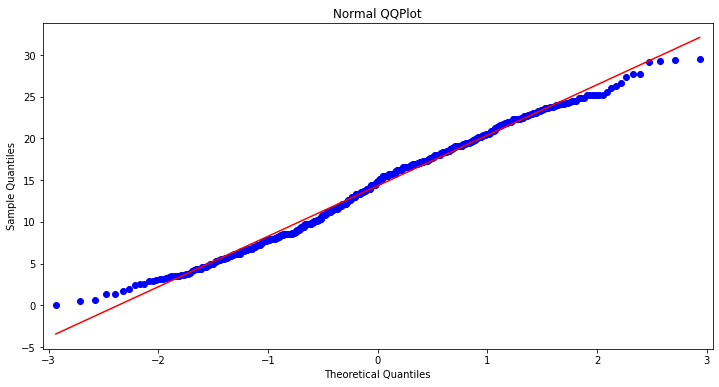

In [55]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['windspeed'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['windspeed'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('windspeed')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['windspeed'],one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['windspeed'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['windspeed'])

In [56]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['windgust'])

Outliers: []


In [57]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windgust']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windgust'] = one_hot_encoded_data['windgust'].replace(i, med)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


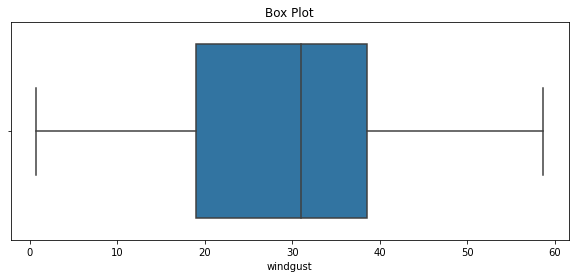

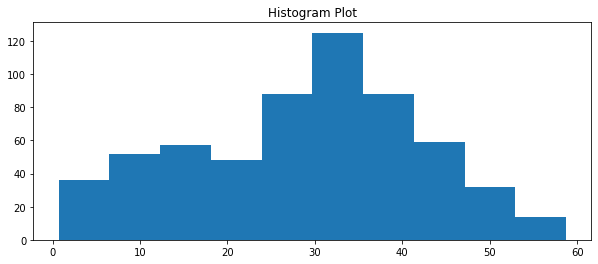

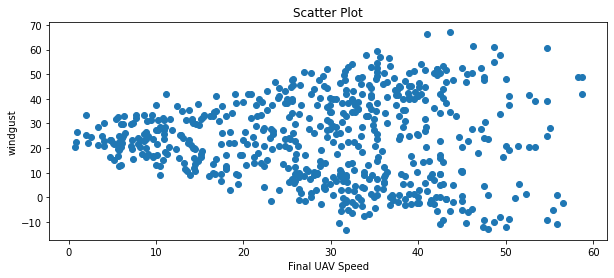

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


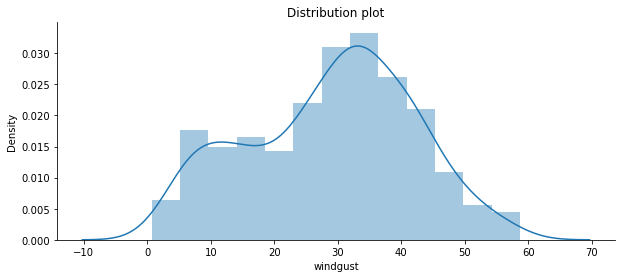

<Figure size 720x288 with 0 Axes>

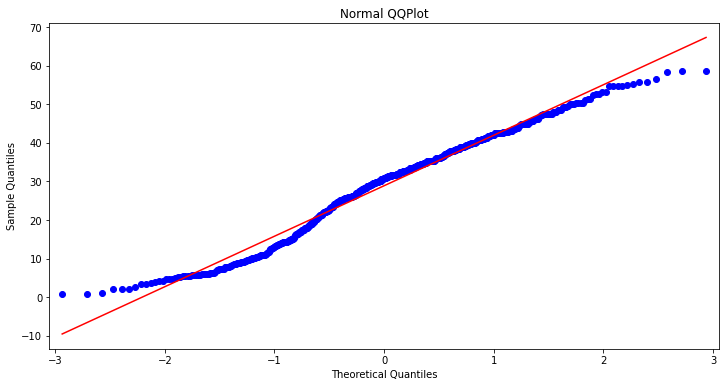

In [58]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['windgust'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['windgust'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('windgust')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['windgust'],one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['windgust'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['windgust'])

In [59]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['visibility']:
        if i > q3 or i < q1:
            one_hot_encoded_data['visibility'] = one_hot_encoded_data['visibility'].replace(i, med)

In [60]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['visibility'])

Outliers: []


In [61]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(one_hot_encoded_data['cos(gap angle)'])

Outliers: [1.0, -0.9999480821, 0.9998962744, 0.9989577808, -0.9999911242, 0.9989577808, 0.9997394112, -0.9999911242, 0.9993069282, -0.9999911242]


In [62]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['cos(gap angle)'])

Outliers: []


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


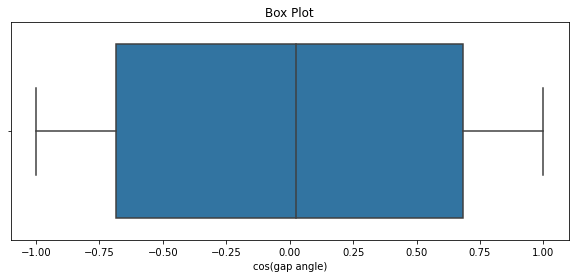

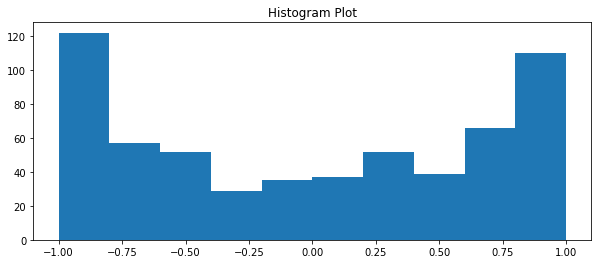

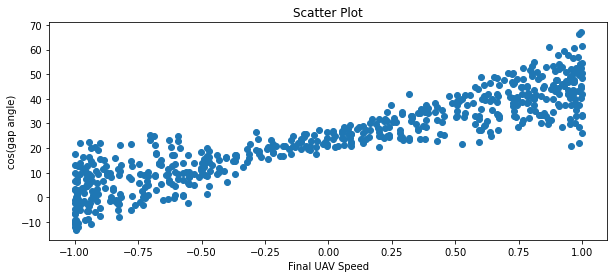

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


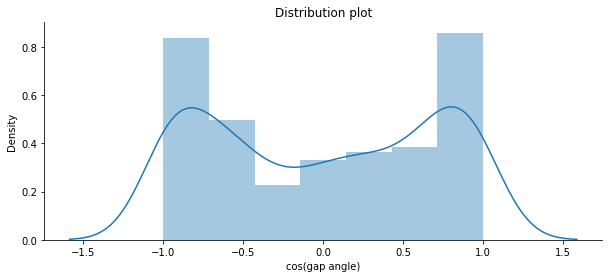

<Figure size 720x288 with 0 Axes>

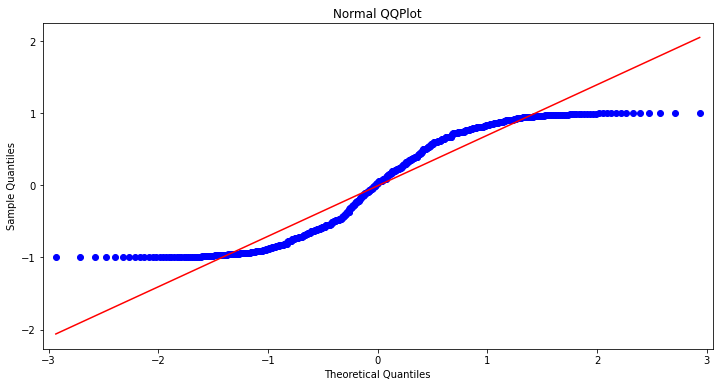

In [63]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['cos(gap angle)'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['cos(gap angle)'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('cos(gap angle)')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['cos(gap angle)'],one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['cos(gap angle)'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['cos(gap angle)'])

In [64]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Speed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Speed'] = one_hot_encoded_data['UAV Speed'].replace(i, med)

In [65]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['UAV Speed'])

Outliers: []


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


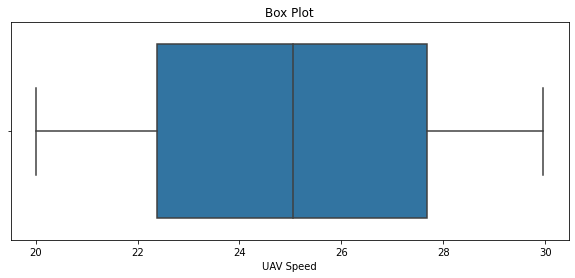

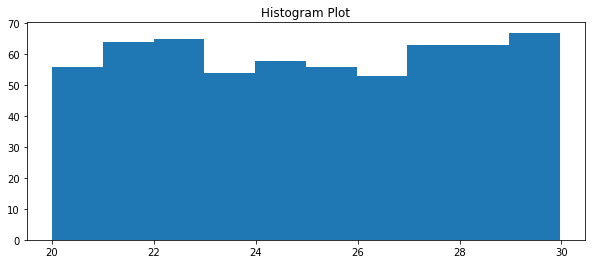

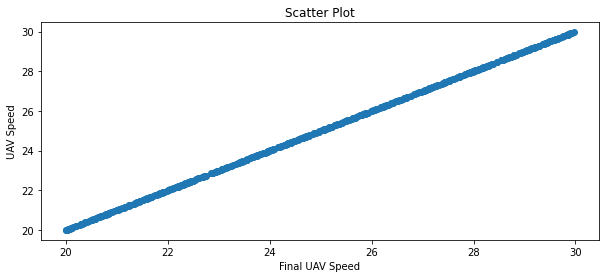

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


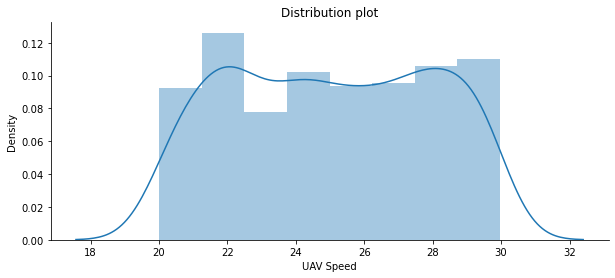

<Figure size 720x288 with 0 Axes>

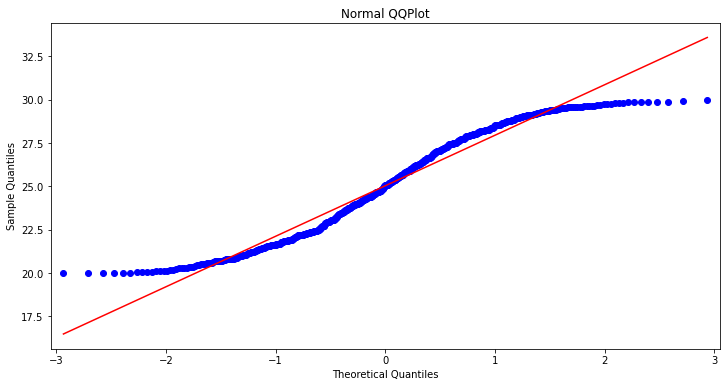

In [66]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['UAV Speed'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['UAV Speed'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('UAV Speed')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['UAV Speed'],one_hot_encoded_data['UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['UAV Speed'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['UAV Speed'])

In [67]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(one_hot_encoded_data['UAV Payload'])

Outliers: []


In [68]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Payload']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Payload'] = one_hot_encoded_data['UAV Payload'].replace(i, med)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


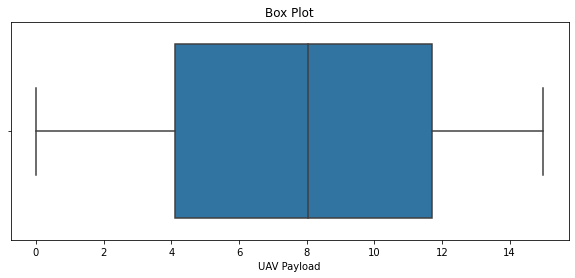

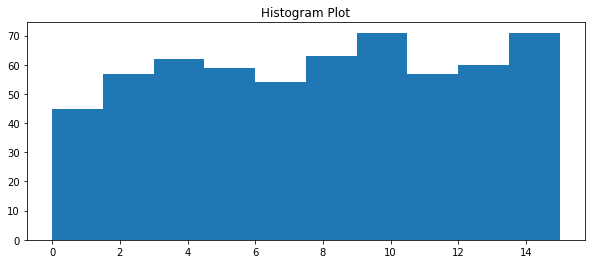

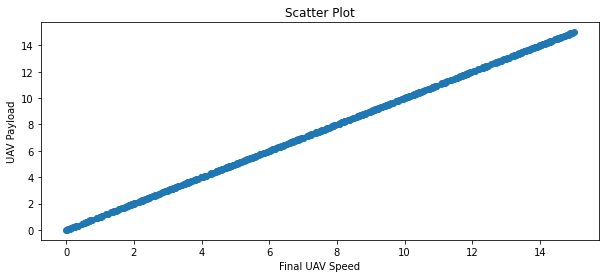

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


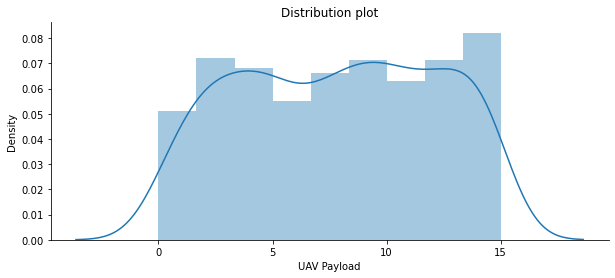

<Figure size 720x288 with 0 Axes>

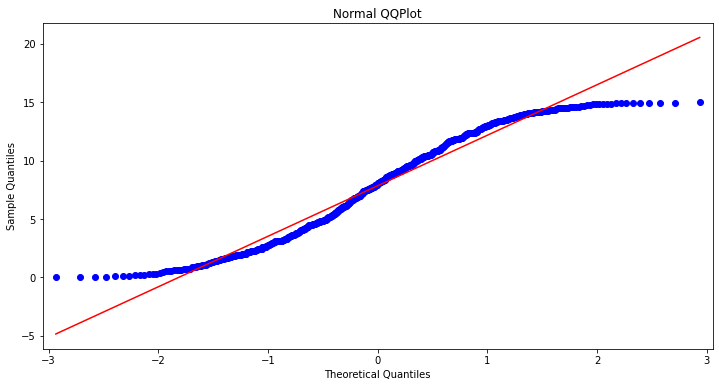

In [69]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['UAV Payload'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['UAV Payload'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Final UAV Speed')
    ax.set_ylabel('UAV Payload')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(one_hot_encoded_data['UAV Payload'],one_hot_encoded_data['UAV Payload'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['UAV Payload'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['UAV Payload'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


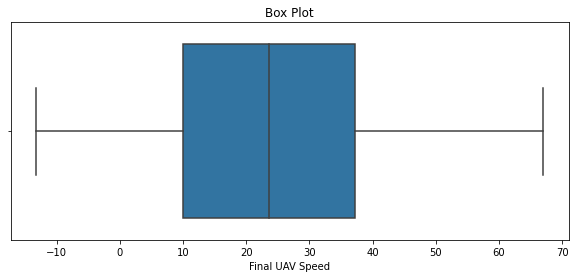

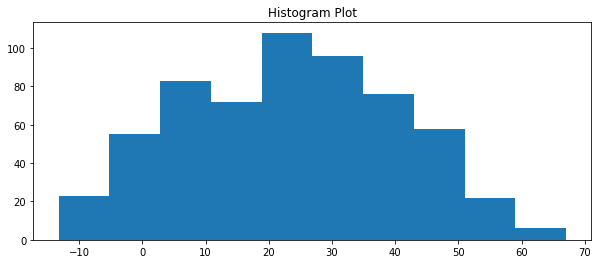

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


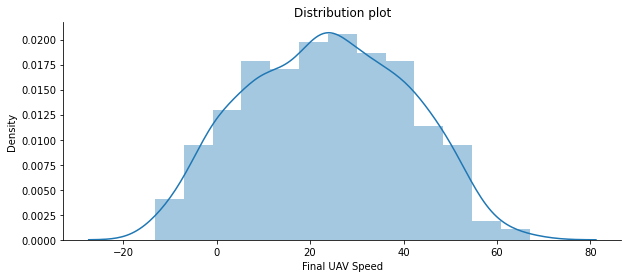

<Figure size 720x288 with 0 Axes>

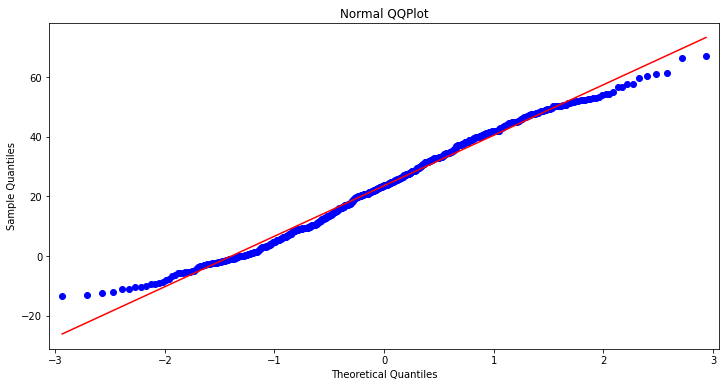

In [70]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(one_hot_encoded_data['Final UAV Speed'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(one_hot_encoded_data['Final UAV Speed'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(one_hot_encoded_data['Final UAV Speed'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(one_hot_encoded_data['Final UAV Speed'])

In [71]:
one_hot_encoded_data

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,24.114473,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,22.112219,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,24.971050,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,26.510384,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,21.457721,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,8.161948,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,6.761284,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,22.289679,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,10.335083,1,0,0,0,0


In [72]:
import pandas as pd     

In [73]:
from sklearn import preprocessing

In [74]:
X = one_hot_encoded_data[['temp','dew','precip','windgust','windspeed','visibility','cos(gap angle)','UAV Speed','UAV Payload','conditions_Clear','conditions_Overcast','conditions_Partially cloudy','conditions_Rain, Overcast','conditions_Rain, Partially cloudy']]
y = one_hot_encoded_data['Final UAV Speed']

In [75]:
X

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,1,0,0,0,0


In [76]:
y

0      24.114473
1      22.112219
2      24.971050
3      26.510384
4      21.457721
         ...    
596     8.161948
597     6.761284
598    22.289679
599    10.335083
600    34.311301
Name: Final UAV Speed, Length: 599, dtype: float64

In [77]:
def mse(y_test,y_pred):
  return mean_squared_error(y_test,y_pred)

In [78]:
cat_model = CatBoostRegressor(loss_function='RMSE',logging_level='Silent')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [80]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [81]:
grid = {'iterations': [100,300,500],
        'learning_rate': [0.03,0.05],
        'depth': [1,3,5,7,9],
        }
cat_model.grid_search(grid, train_dataset)

0:	loss: 8.3087675	best: 8.3087675 (0)	total: 210ms	remaining: 6.1s
1:	loss: 7.4116807	best: 7.4116807 (1)	total: 230ms	remaining: 3.23s
2:	loss: 6.9017874	best: 6.9017874 (2)	total: 291ms	remaining: 2.62s
3:	loss: 6.7988665	best: 6.7988665 (3)	total: 350ms	remaining: 2.27s
4:	loss: 6.8045650	best: 6.7988665 (3)	total: 452ms	remaining: 2.26s
5:	loss: 6.7530122	best: 6.7530122 (5)	total: 555ms	remaining: 2.22s
6:	loss: 4.6947123	best: 4.6947123 (6)	total: 602ms	remaining: 1.98s
7:	loss: 3.1401372	best: 3.1401372 (7)	total: 650ms	remaining: 1.79s
8:	loss: 2.0873507	best: 2.0873507 (8)	total: 776ms	remaining: 1.81s
9:	loss: 1.6635230	best: 1.6635230 (9)	total: 897ms	remaining: 1.79s
10:	loss: 1.7036972	best: 1.6635230 (9)	total: 1.11s	remaining: 1.92s
11:	loss: 1.3910918	best: 1.3910918 (11)	total: 1.32s	remaining: 1.98s
12:	loss: 4.1375186	best: 1.3910918 (11)	total: 1.43s	remaining: 1.87s
13:	loss: 2.4605062	best: 1.3910918 (11)	total: 1.52s	remaining: 1.74s
14:	loss: 1.5618343	best: 1.

{'params': {'depth': 5, 'iterations': 500, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [82]:
tuned_cat_model=CatBoostRegressor(iterations=500, max_depth=5, learning_rate=0.05)

In [83]:
tuned_cat_model.fit(X_train,y_train)

0:	learn: 16.5706286	total: 42.3ms	remaining: 21.1s
1:	learn: 16.0097294	total: 43.4ms	remaining: 10.8s
2:	learn: 15.3809310	total: 44.4ms	remaining: 7.36s
3:	learn: 14.7673750	total: 45.6ms	remaining: 5.65s
4:	learn: 14.1782013	total: 46.5ms	remaining: 4.61s
5:	learn: 13.6465117	total: 47.6ms	remaining: 3.92s
6:	learn: 13.0874120	total: 48.6ms	remaining: 3.42s
7:	learn: 12.6197146	total: 49.4ms	remaining: 3.04s
8:	learn: 12.1463671	total: 50.1ms	remaining: 2.73s
9:	learn: 11.7829835	total: 50.9ms	remaining: 2.5s
10:	learn: 11.3294863	total: 51.8ms	remaining: 2.3s
11:	learn: 10.9828028	total: 52.5ms	remaining: 2.13s
12:	learn: 10.5731228	total: 53.4ms	remaining: 2s
13:	learn: 10.2198283	total: 54.3ms	remaining: 1.89s
14:	learn: 9.8774182	total: 55.4ms	remaining: 1.79s
15:	learn: 9.5387844	total: 56.2ms	remaining: 1.7s
16:	learn: 9.1912539	total: 57.1ms	remaining: 1.62s
17:	learn: 8.9383502	total: 57.9ms	remaining: 1.55s
18:	learn: 8.6966170	total: 58.7ms	remaining: 1.49s
19:	learn: 8.4

In [84]:
y_train_predict=tuned_cat_model.predict(X_train)

In [85]:
print(mse(y_train,y_train_predict))

0.111279536772208


In [86]:
y_predict=tuned_cat_model.predict(X_test)
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
print(diff)

     Actual value  Predicted value
127     19.683157        20.524081
48      17.296196        17.742341
489     35.042767        34.762791
411     41.695597        41.162763
225     22.861270        22.542802
..            ...              ...
55      28.401389        28.896241
90      50.581750        51.222121
390     21.954901        21.586262
392     21.180352        21.047554
522     34.697088        35.094238

[120 rows x 2 columns]


In [87]:
print(mse(y_test,y_predict))

0.9719068022285186


Text(0.5, 1.0, 'Feature Importance')

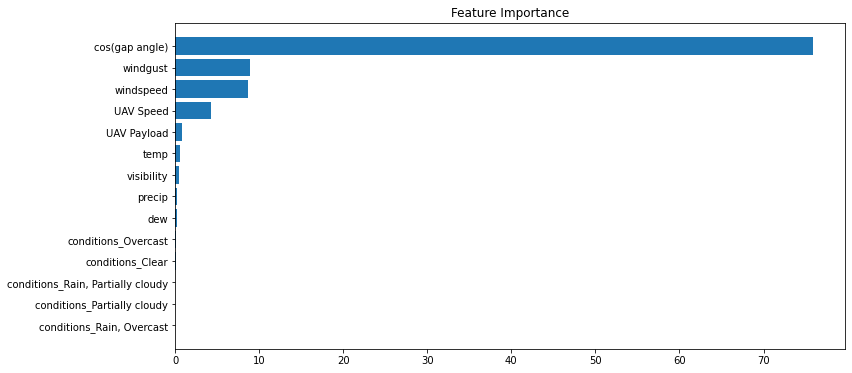

In [88]:
feature_importance = tuned_cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

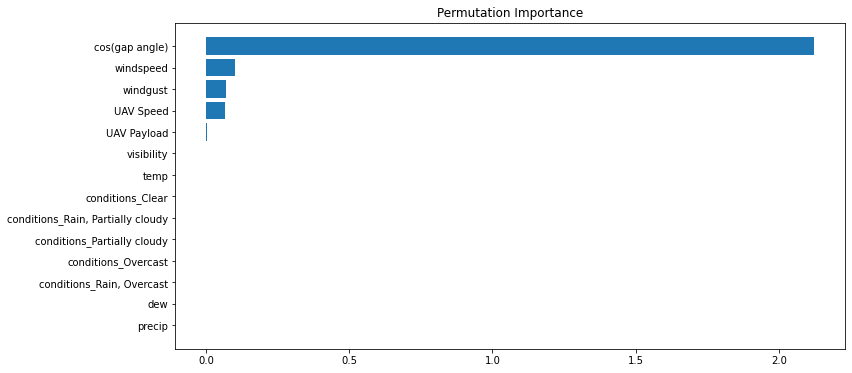

In [89]:
perm_importance = permutation_importance(tuned_cat_model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

Text(0.5, 1.0, 'SHAP Importance')

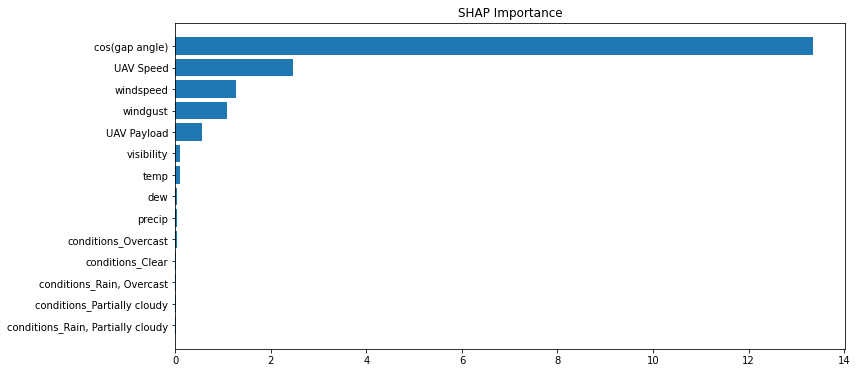

In [90]:
explainer = shap.Explainer(tuned_cat_model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

In [91]:
one_hot_encoded_data_final = one_hot_encoded_data.drop(['visibility','dew','precip','conditions_Partially cloudy','conditions_Overcast','conditions_Clear','conditions_Rain, Partially cloudy','conditions_Rain, Overcast'], axis = 1)

In [92]:
one_hot_encoded_data_final

,temp,windgust,windspeed,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,7.9,5.4,0.281703,22.382043,2.566546,24.114473
1,6.8,5.1,3.2,-0.900007,28.187742,10.483025,22.112219
2,6.2,6.2,4.3,-0.688493,29.375444,1.553021,24.971050
3,5.5,8.9,5.3,0.635886,23.710883,13.169636,26.510384
4,6.0,7.9,4.3,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...
596,14.6,30.2,16.9,-0.784794,28.608596,4.485393,8.161948
597,13.6,31.4,15.7,-0.715012,24.484307,3.080164,6.761284
598,12.6,32.6,14.5,-0.109373,25.770818,5.489982,22.289679
599,11.6,33.8,13.3,-0.710821,27.896114,9.099070,10.335083


In [93]:
X_final = one_hot_encoded_data_final[['temp','windgust','windspeed','cos(gap angle)','UAV Speed','UAV Payload']]
y_final = one_hot_encoded_data_final['Final UAV Speed']

In [94]:
def mse(y_test,y_pred):
  return mean_squared_error(y_test,y_pred)

In [95]:
cat_model = CatBoostRegressor(loss_function='RMSE',logging_level='Silent')

In [96]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [97]:
train_dataset_final = cb.Pool(X_train_final, y_train_final) 
test_dataset_final = cb.Pool(X_test_final, y_test_final)

In [98]:
grid = {'iterations': [100,300,500],
        'learning_rate': [0.03,0.05],
        'depth': [1,3,5,7,9],
        }
cat_model.grid_search(grid, train_dataset_final)

0:	loss: 8.2107654	best: 8.2107654 (0)	total: 55.8ms	remaining: 1.62s
1:	loss: 7.4060809	best: 7.4060809 (1)	total: 79.1ms	remaining: 1.11s
2:	loss: 6.8938969	best: 6.8938969 (2)	total: 143ms	remaining: 1.28s
3:	loss: 6.7975211	best: 6.7975211 (3)	total: 202ms	remaining: 1.31s
4:	loss: 6.7906091	best: 6.7906091 (4)	total: 300ms	remaining: 1.5s
5:	loss: 6.7210340	best: 6.7210340 (5)	total: 402ms	remaining: 1.61s
6:	loss: 4.2319219	best: 4.2319219 (6)	total: 441ms	remaining: 1.45s
7:	loss: 2.7692091	best: 2.7692091 (7)	total: 482ms	remaining: 1.33s
8:	loss: 2.0499233	best: 2.0499233 (8)	total: 601ms	remaining: 1.4s
9:	loss: 1.5097083	best: 1.5097083 (9)	total: 745ms	remaining: 1.49s
10:	loss: 1.6117589	best: 1.5097083 (9)	total: 961ms	remaining: 1.66s
11:	loss: 1.2344259	best: 1.2344259 (11)	total: 1.17s	remaining: 1.75s
12:	loss: 3.7376579	best: 1.2344259 (11)	total: 1.24s	remaining: 1.63s
13:	loss: 2.1463924	best: 1.2344259 (11)	total: 1.32s	remaining: 1.51s
14:	loss: 1.3160047	best: 1

{'params': {'depth': 5, 'iterations': 500, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [99]:
tuned_cat_model=CatBoostRegressor(iterations=500, max_depth=5, learning_rate=0.05)

In [100]:
tuned_cat_model.fit(X_train_final,y_train_final)

0:	learn: 16.6375903	total: 1.13ms	remaining: 563ms
1:	learn: 15.9997772	total: 2.06ms	remaining: 512ms
2:	learn: 15.4285233	total: 2.98ms	remaining: 494ms
3:	learn: 14.8626652	total: 3.8ms	remaining: 472ms
4:	learn: 14.3472069	total: 4.66ms	remaining: 462ms
5:	learn: 13.8857709	total: 5.48ms	remaining: 451ms
6:	learn: 13.4117208	total: 6.34ms	remaining: 446ms
7:	learn: 12.9708957	total: 7.17ms	remaining: 441ms
8:	learn: 12.5153343	total: 8.08ms	remaining: 441ms
9:	learn: 12.0491547	total: 9.06ms	remaining: 444ms
10:	learn: 11.6072696	total: 10ms	remaining: 447ms
11:	learn: 11.1767754	total: 11ms	remaining: 448ms
12:	learn: 10.7624204	total: 12ms	remaining: 449ms
13:	learn: 10.3608774	total: 13.2ms	remaining: 457ms
14:	learn: 9.9842417	total: 14.4ms	remaining: 465ms
15:	learn: 9.6171392	total: 15.6ms	remaining: 471ms
16:	learn: 9.2868867	total: 16.7ms	remaining: 475ms
17:	learn: 8.9586658	total: 17.7ms	remaining: 475ms
18:	learn: 8.6535636	total: 18.8ms	remaining: 476ms
19:	learn: 8.33

In [101]:
y_train_predict=tuned_cat_model.predict(X_train_final)

In [102]:
print(mse(y_train_final,y_train_predict))

0.10640805658769907


In [103]:
y_predict_final=tuned_cat_model.predict(X_test_final)
diff_final = pd.DataFrame({'Actual value': y_test_final, 'Predicted value': y_predict_final})
print(diff_final)

     Actual value  Predicted value
127     19.683157        20.125254
48      17.296196        19.403384
489     35.042767        35.150457
411     41.695597        41.048492
225     22.861270        23.342687
..            ...              ...
55      28.401389        28.593131
90      50.581750        50.436701
390     21.954901        22.784244
392     21.180352        21.062670
522     34.697088        35.398493

[120 rows x 2 columns]


In [104]:
print(mse(y_test_final,y_predict_final))

0.5585414953522324


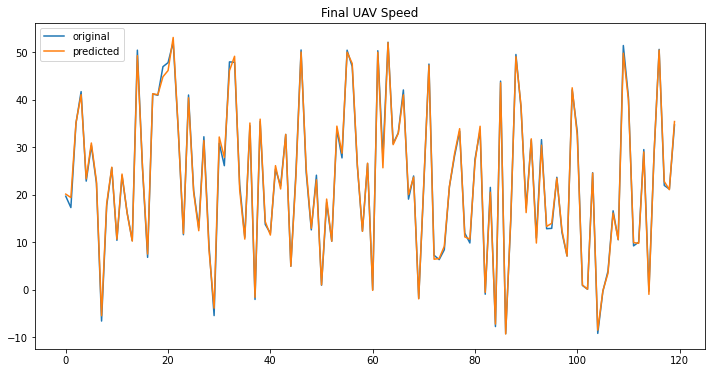

In [106]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_predict_final, label="predicted")
plt.title("Final UAV Speed")
plt.legend()
plt.show()